<a href="https://colab.research.google.com/github/ChristianJFG/Portfolio-GitHub/blob/main/Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# For numerical computation
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For cool interactive stuff
import panel as pn

# For image analysis
import skimage.io

# To find files
import glob

# Mount Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

pn.extension()
sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analyze *E. coli* colony growth images

In [ ]:
# List files in folder
phase_files = np.sort(glob.glob(
    "/content/drive/MyDrive/CdeC/PBoC_online/ecoli_growth/*TRITC*tif"
))

In [ ]:
# Import example image into memory
im = skimage.io.imread(phase_files[-1])

im

array([[206, 206, 205, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 205],
       ...,
       [206, 206, 206, ..., 203, 204, 204],
       [205, 205, 205, ..., 203, 204, 204],
       [205, 205, 205, ..., 203, 205, 205]], dtype=uint16)

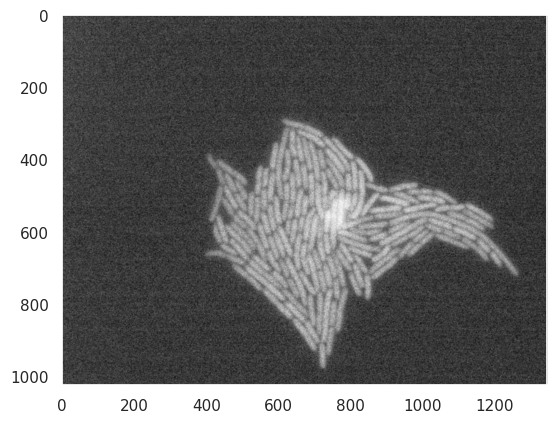

In [ ]:
plt.imshow(im, cmap=plt.cm.Greys_r)
plt.grid(False)

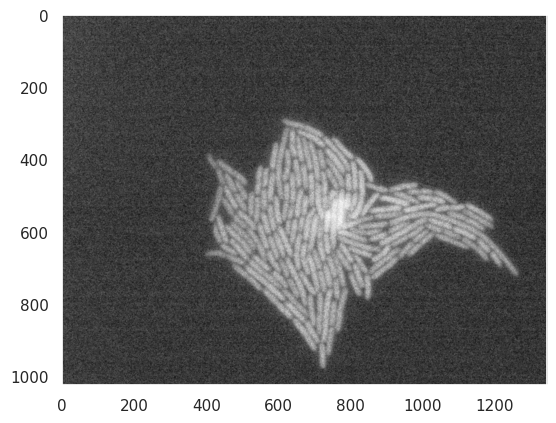

In [ ]:
# Normalize image
im_float = (im - im.min()) / (im.max() - im.min())

# Display normalized image
plt.imshow(im_float, cmap=plt.cm.Greys_r)
plt.grid(False)

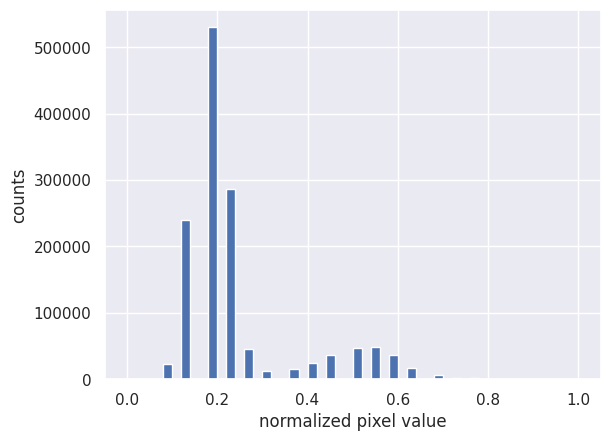

In [ ]:
plt.hist(im_float.flatten(), bins=50, range=(0,1))
plt.xlabel('normalized pixel value')
_ = plt.ylabel('counts')

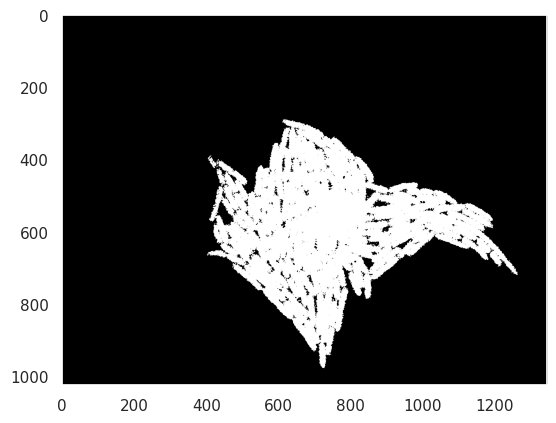

In [ ]:
# Define threshold
thresh = 0.4

# Find pixels associated with cells
im_thresh = im_float > thresh

# Show segmented image
plt.imshow(im_thresh, cmap=plt.cm.Greys_r)
plt.grid(False)

Column
    [0] FloatSlider(name='Threshold slider', step=0.01, value=0.4)
    [1] ParamFunction(function, _pane=Matplotlib, defer_load=False)
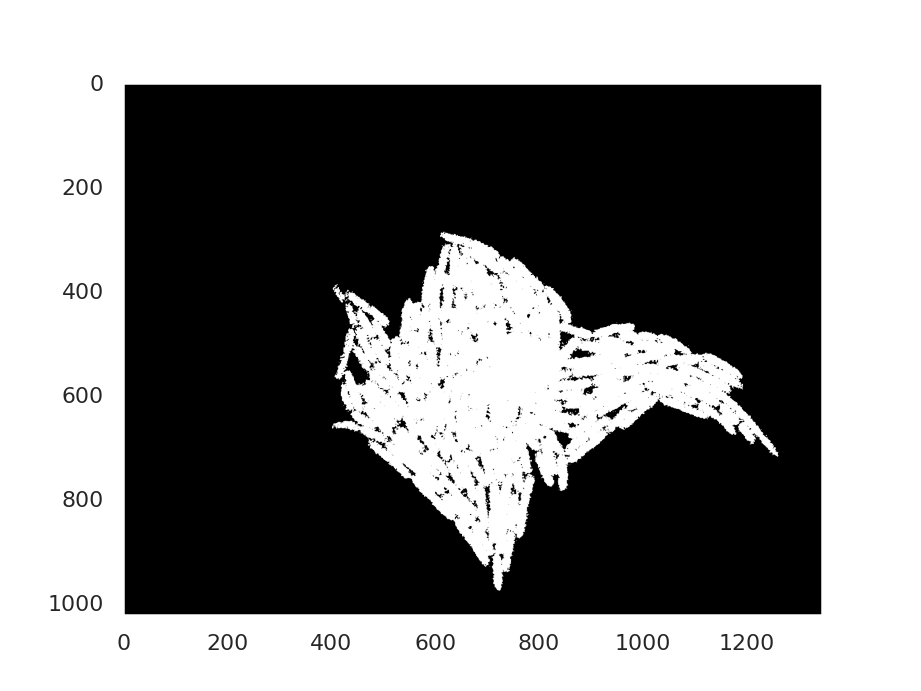

In [ ]:
# Define slider using panel
thresh_slider = pn.widgets.FloatSlider(
    name='Threshold slider',
    start=0,
    end=1,
    step=0.01,
    value=0.4
)

# Define interactive plot
@pn.depends(thresh_slider.param.value)
def get_plot(thresh):
    fig, ax = plt.subplots(1, 1) # initialize empty plot
    ax.imshow(im_float > thresh,
               cmap = plt.cm.Greys_r)
    ax.grid(False)
    plt.close(fig)
    return fig

# Arrange interactive plot
pn.Column(
    thresh_slider,
    get_plot
)